In [1]:
# Visualizacion del dataset
import pandas as pd

df = pd.read_csv('../Data/GlobalFireBurnedArea_2022.csv')
#df.to_csv('../Data/Nasa_MeteoriteLanding.csv')
df

,ID,Initialdate,Finaldate,Area_ha,Area_m2,Area_Km2,CountryName,Continent,Region
0,25078590,2022/01/09 00:00,2022/02/06 00:00,50232.10763,5.023211e+08,502.321076,Ghana,Africa,Western Africa
1,25079092,2022/01/11 00:00,2022/02/08 00:00,82380.29538,8.238030e+08,823.802954,Nigeria,Africa,Western Africa
2,25079113,2022/01/11 00:00,2022/02/03 00:00,36851.12748,3.685113e+08,368.511275,Nigeria,Africa,Western Africa
3,25083241,2022/01/03 00:00,2022/02/12 00:00,43303.63519,4.330364e+08,433.036352,Nigeria,Africa,Western Africa
4,25095507,2022/01/01 00:00,2022/02/11 00:00,75753.14059,7.575314e+08,757.531406,Central African Republic,Africa,Middle Africa
...,...,...,...,...,...,...,...,...,...
319273,26103937,2022/12/24 00:00,2023/02/21 00:00,200481.95120,2.004820e+09,2004.819512,Cambodia,Asia,South-Eastern Asia
319274,26073984,2022/12/24 00:00,2023/02/17 00:00,39829.67151,3.982967e+08,398.296715,Sudan,Africa,Northern Africa
319275,26096503,2022/12/10 00:00,2023/02/27 00:00,642906.92060,6.429069e+09,6429.069206,Ethiopia,Africa,Eastern Africa
319276,26098347,2022/12/16 00:00,2023/02/18 00:00,515120.06630,5.151201e+09,5151.200663,Uganda,Africa,Eastern Africa


In [2]:
#Revision de la informacion 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319278 entries, 0 to 319277
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           319278 non-null  int64  
 1   Initialdate  319278 non-null  object 
 2   Finaldate    319278 non-null  object 
 3   Area_ha      319278 non-null  float64
 4   Area_m2      319278 non-null  float64
 5   Area_Km2     319278 non-null  float64
 6   CountryName  319278 non-null  object 
 7   Continent    319278 non-null  object 
 8   Region       319278 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 21.9+ MB


,ID,Area_ha,Area_m2,Area_Km2
count,3.192780e+05,3.192780e+05,3.192780e+05,319278.000000
mean,2.557438e+07,8.783306e+02,8.783306e+06,8.783306
std,3.006964e+05,1.375650e+04,1.375650e+08,137.564988
min,2.503646e+07,1.068460e+02,1.068460e+06,1.068460
25%,2.533053e+07,1.496636e+02,1.496636e+06,1.496636
50%,2.557625e+07,2.565107e+02,2.565107e+06,2.565107
75%,2.581172e+07,5.349487e+02,5.349487e+06,5.349487
max,2.610613e+07,6.092464e+06,6.092464e+10,60924.643560


In [3]:
#Revision de datos nulos.
df.isna().sum()

ID             0
Initialdate    0
Finaldate      0
Area_ha        0
Area_m2        0
Area_Km2       0
CountryName    0
Continent      0
Region         0
dtype: int64

In [4]:
df.columns

Index(['ID', 'Initialdate', 'Finaldate', 'Area_ha', 'Area_m2', 'Area_Km2',
       'CountryName', 'Continent', 'Region'],
      dtype='object')

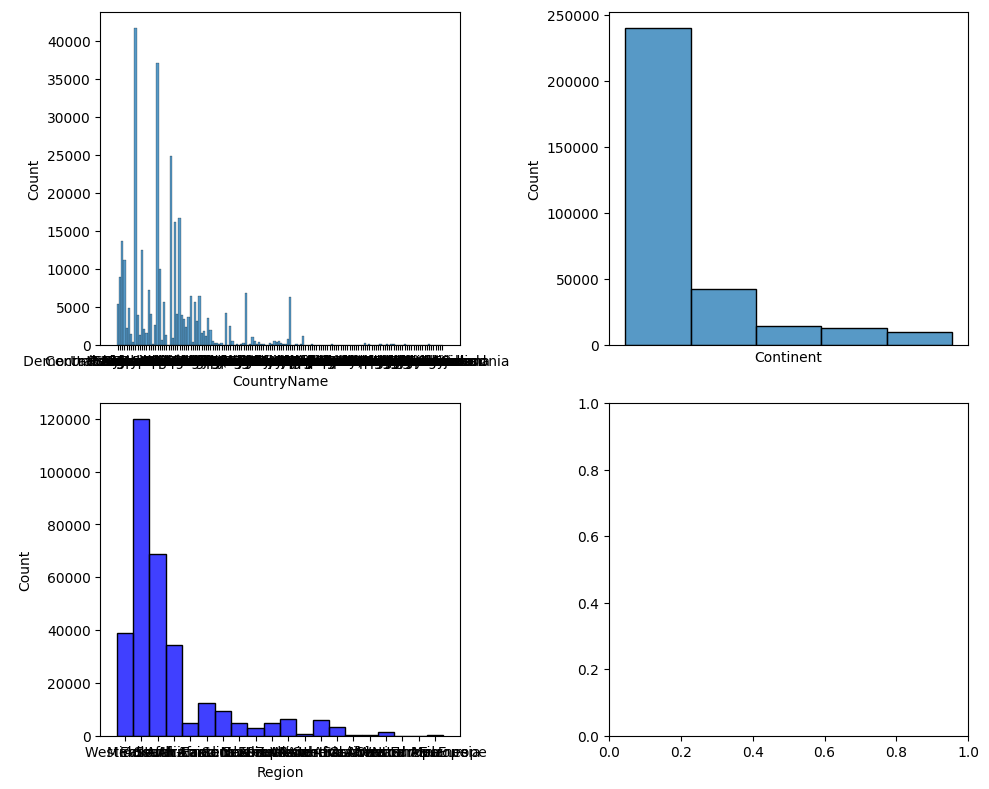

In [5]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

#Graficar variables categoricas
fig,axis = plt.subplots(2, 2, figsize=(10,8))

sns.histplot(ax=axis[0,0],data=df,x='CountryName')             
sns.histplot(ax=axis[0,1],data=df,x='Continent').set_xticks([])
sns.histplot(ax=axis[1,0],data=df,x='Region', color='blue')

plt.tight_layout()
plt.show()

In [6]:
#Analisis multivariante: Numerico-Categorico
#Pasar variables categoricas a numericas
df['CountryName_n']=pd.factorize(df['CountryName'])[0]                    
df['Continent_n']=pd.factorize(df['Continent'])[0]
df['Region_n']=pd.factorize(df['Region'])[0]
df.head()

,ID,Initialdate,Finaldate,Area_ha,Area_m2,Area_Km2,CountryName,Continent,Region,CountryName_n,Continent_n,Region_n
0,25078590,2022/01/09 00:00,2022/02/06 00:00,50232.10763,502321076.3,502.321076,Ghana,Africa,Western Africa,0,0,0
1,25079092,2022/01/11 00:00,2022/02/08 00:00,82380.29538,823802953.8,823.802954,Nigeria,Africa,Western Africa,1,0,0
2,25079113,2022/01/11 00:00,2022/02/03 00:00,36851.12748,368511274.8,368.511275,Nigeria,Africa,Western Africa,1,0,0
3,25083241,2022/01/03 00:00,2022/02/12 00:00,43303.63519,433036351.9,433.036352,Nigeria,Africa,Western Africa,1,0,0
4,25095507,2022/01/01 00:00,2022/02/11 00:00,75753.14059,757531405.9,757.531406,Central African Republic,Africa,Middle Africa,2,0,1


In [7]:
df.columns

Index(['ID', 'Initialdate', 'Finaldate', 'Area_ha', 'Area_m2', 'Area_Km2',
       'CountryName', 'Continent', 'Region', 'CountryName_n', 'Continent_n',
       'Region_n'],
      dtype='object')

In [8]:
# Analisis de correlacion.
sns.heatmap(df[['Initialdate', 'Finaldate','Area_Km2', 'CountryName_n', 'Continent_n','Region_n']].corr(),annot=True,fmt='.2f')

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: '2022/01/09 00:00'